## 1.  Yifan's method
Find similar words through modeling training on Word2Vec

In [1]:
from Data_Processor import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from collections import Counter
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim import utils

import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import Word2Vec, CoherenceModel

import pprint

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
model = gensim.models.Word2Vec.load('D')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Erzi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Erzi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Erzi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
modelD = gensim.models.Word2Vec.load('D')
model = gensim.models.Word2Vec.load('MSmodel')
items=modelD.wv.most_similar(['digital','platform','app'], topn=20)
words=[_[0] for _ in items]
#for item, prob in items:
#    print(item, prob)

## 2.  Ruofan's method
Find similar words through visualization and manually check

In [3]:
dirlists=[[r"D:/final/Morgan_Stanley"],[r"D:/final/Goldman_Sachs/Goldman_Sachs",r"D:/final/UBS/UBS"]
          ,[r"D:/final/Merrill Lynch/MerrillLynch",r"D:/final/JPMorgan/JPMorgan",r"D:/final/Wells Fargo/WellsFargo"],
          [r"D:/final/Betterment/Betterment",r"D:/final/wealthfront/wealthfront",r"D:/final/Ellevest/Ellevest"],
          [r"D:/final/Fidelity/FidelityInvestments",r"D:/final/eTrade/eTrade",r"D:/final/TD Ameritrade/TDAmeritrade",
          r"D:/final/Charles Schwab/CharlesSchwab",r"D:/final/InteractiveBrokers/InteractiveBrokers",
          r"D:/final/Robinhood/Robinhood",r"D:/final/Tradestation/Tradestation"]]
result=process(dirlists,start_month='2017-06',end_month='2020-05')

In [4]:
DPms,DPfull,DPbank,DProbo,DPdisc=result.values()
DPS=(DPms,DPfull,DPbank,DProbo,DPdisc)

Copy another DPt as tokenized data -> good for later network analysis (remove stop words)

In [5]:
#DP is not tokenized, choose another DPt as tokenized data for later network analysis
#DPt = Data_Processor(start_month='2017-06',end_month='2020-05',template=dirlist)
#DPt.data=DP.data
#DPt.tokenizetext()

### 2.1 Analyze the sentiment / frequency trend

In [6]:
topic_words = list(set(['online','digital','platform','website', 'experience',' app ','site',' ui ',
               'online account','digital platform','self service','mobile app','online experience',
              'digital service','encrypted','software','call']))

### 2.1.1 MS

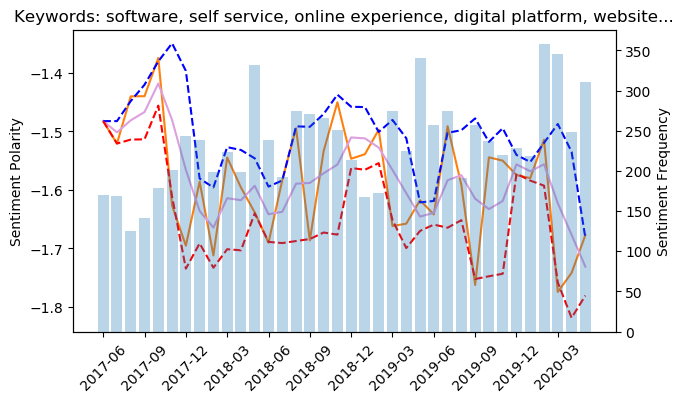

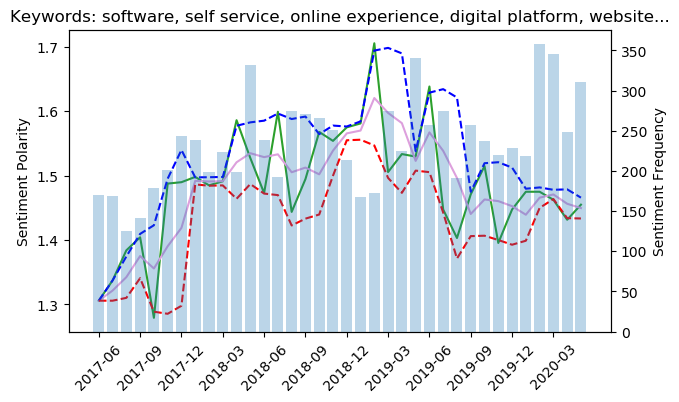

In [7]:
DPms.trend_analysis(polarity = [0,1], keyword_list = topic_words,count=1,ma=3)

In [54]:
month = ['2020-03']  #choose the month here (must be a list)
#topic_words = [' app ',' apps'] #choose the topic here
tweet_result = DPms.show_tweets(month_list = month, 
                            keywords = topic_words, 
                            count = 1,
                            threshold = [5,5], #choose only pos>2 & neg<-2 tweets
                            unique = True)  #choose only the unique tweets

print(f"Total Counts: {len(tweet_result)} \n")
for item in tweet_result:
    print(item[0], item[1], item[2],item[3],'\n')

Total Counts: 0 



#2017-10 Neg
1. Contra Morgan Stanley there is NOTHING visible to underpin expected growth rate of 10%;No clue, no humanity
Morgan Stanley says forced digitization will boost the economy. Sorry, Morgan Stanley, we disagree.
2. I have no clue if money is with citi or Morgan Stanley all I know is they are justifying theft using my website and forcing me to palakkad
3. Hi, access to careers site suddenly blocked over 24 hrs ago. Can't unblock using help provided. Pls help
Never got a response @USEEOC @EEOC_NYDO #befair #accountability
4. VPS support: "Could I get the last 4 characters of the Main account password to verify?" Me: "Uh…you store passwords in plaintext?"
That's why I stopped using the Morgan Stanley site for my stocks (their passwords also had an 8 character maximum limit
5. The @MorganStanley mobile app is so bad, forcing me to reconsider who handles my money and investments..

#2017-11 Neg
1. If you ever buy a property DO NOT use Morgan Stanley for your loan. The worst experience I’ve ever had. 
2. Reporting software failures sees Morgan Stanley fined in the US
3. wow - never want to have shares with @MorganStanley- omg what a poor customer experience :(

#2019-02 Neg
1.Congrats to Morgan Stanley’s client service center on achieving J.D. Power certification for outstanding phone support customer service for a second year in a row in its Cash Management and Digital Platform Support and for the first time in its Global Stock Plan Services business
POS 2. Nicola Sturgeon visited Morgan Stanleys Fusion Centre in New York to discuss collaborative projects at the firms centre of excellence in Scotland
3.Why do high-end investment firms still insist on charging a 1% fee when information like this is freely available online. 
@MorganStanley, thanks for the great coffee, wonderful view, and nice conversation yesterday. But 1% is a little too much, right?

#2019-07 Pos
1.Excited to share that @MorganStanley Wealth Management has launched a new encrypted document sharing portal for clients in collaboration with Box!Check out Morgan Stanley's Digital Vault: https://bit.ly/2JQTCIo
-Morgan Stanley is offering its million wealthmanagement customers an encrypted platform where they can store financial documents and share them with the bank more securely than faxing emailing or mailing information via WSJ

#2019-08 Neg
1.Morgan Stanley analysts say a "New Stack" of infrastructure software is helping companies deal with the increased demands—and speed—of the digital age. #DevOps, #Agile, #NoSQL #MSIdeas
--Great! How secure are these "New Stack" software systems from aggressive hacking?  Do they sacrifice security for speed?  Will adopters be the next to suffer humiliation at the hands of Russian or Chinese hacking teams? Who will be early adopters of this technology - warn clients
--Very interesting. Don't promote crypto currency as real investment
--And causing everyone to lose their jobs. Cool article. Thanks dickheads.
2.Maybe instead of investing in golfers, you should invest in your mobile app which has been giving this super helpful error message (on login) for days.

#2019-09 Neg
1.#morganstanley sends wrong forms to their customers. And tells them only after two weeks that the form sent was incorrect. Worst customer care experience.
2. Dear @MorganStanley! You're claiming that the 2nd machine age is already taking off with growth for AI software of 42% p.a. Did you check your sources properly? You quoted Markets & Markets, a shady Indian firm that also has 5000$-priced forecasts about the Asian frozen food...
3. In case you missed it a new Morgan Stanley analysis warns about the danger and inevitability of the rise of superhuman artificial intelligence bots in the online poker ecosystem

#2020-03 Neg
1.@MorganStanley currently experiencing trading outages firm wide for wealth management. App and website for clients down as well 
--Confirmed. Online is completely down for 2.5 hours. Unbelievable ! 
--This is good news, but hasn’t helped my inability to get onto Morgan Stanley online, which has been completely down since at least 12:30. Really!!
--WTF Just get your web site working IB never goes down
--@morganstanley should be ashamed you cannot keep your online portal actually online - maybe you shouldn't have laid off all those technologists at the end of 2019
2.Have to say whenever @CNBC has @MorganStanley #MikeWSilson on you can almost bet the Market will do the opposite. How you can get paid a great salary & being considered a Top Analyst while being so consistently wrongs & wishy-washy is amazing.
3. Hey @etrade, your new app for iOS sucks. If this is a sign of things to come with @MorganStanley, then I'm going back to @MerrillLynch
-@etrade Morgan Stanley takes over and they steal my app. Give me old mobile app back or I’m leaving.

4. Here we go - can always count on Morgan Stanley to help you lose money.Timestamp this.The exact opposite will happen. The $ goes EVEN further up from here (already near its highest levels).
5. If I can get someone in Morgan Stanley complaint team to respond to my issues I would be more than happy to consider investing Its been days since I executed my last trade AND still no funds deposited in my account Never have this problem with Crypto Need solution now
6. Morgan Stanley Sued Over Website Access by Blind Woman
7.Twitter's Jack Dorsey was just interviewed for 40 minutes on stage at a banking conference, in front of a bunch of investors, and was not asked a single question about Elliott Management or the activist investors trying to push him out of a job
--That’s absolutely nuts to me. It seems even worse than tech platforms earnings calls where obvious questions are avoided. Makes me feel less confident in anything from Morgan Stanley.

In [45]:
percentage(tweet_result)

[[(1, -2), 25, 0.2840909090909091],
 [(2, -2), 16, 0.18181818181818182],
 [(2, -1), 13, 0.14772727272727273],
 [(1, -3), 11, 0.125],
 [(3, -1), 7, 0.07954545454545454],
 [(3, -2), 4, 0.045454545454545456],
 [(2, -3), 4, 0.045454545454545456],
 [(1, -4), 3, 0.03409090909090909],
 [(3, -3), 2, 0.022727272727272728],
 [(2, -4), 2, 0.022727272727272728],
 [(4, -2), 1, 0.011363636363636364]]

### 2.1.2 Robo Advisor

In [11]:
#Blooom Unavailabel
#No enough data to further divide

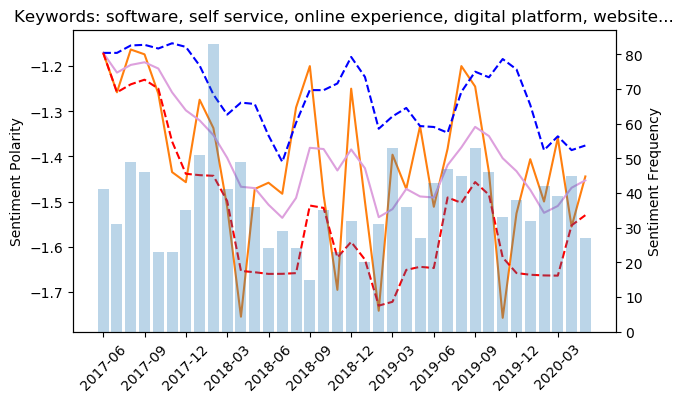

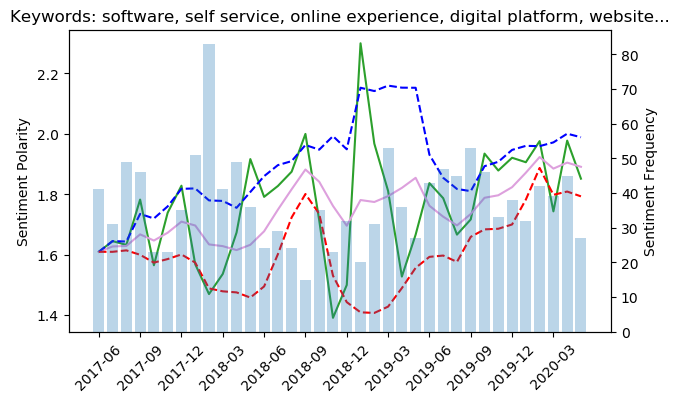

In [48]:
DProbo.trend_analysis(polarity = [0,1], keyword_list = topic_words,count=1,ma=5)

In [53]:
month = ['2018-04']  #choose the month here (must be a list)
#topic_words = [' app ',' apps'] #choose the topic here
tweet_result = DProbo.show_tweets(month_list = month, 
                            keywords = topic_words, 
                            count = 1,
                            threshold = [5,1], #choose only pos>2 & neg<-2 tweets
                            unique = True)  #choose only the unique tweets

print(f"Total Counts: {len(tweet_result)} \n")
for item in tweet_result:
    print(item[0], item[1], item[2],item[3],'\n')

Total Counts: 21 

 Best Low Fee Robo Advisors Ones If youre ready to turn over your investment management to a pro so you have more time for living then check out these digital financial advisors MFinance betterment  2 -2 /barbfriedberg/status/990293109794844675 

 Love the platform but please please integrate with tradelogtweets Your customers have to do wash sale accounting across ALL their trading accounts Manually entering all the Wealthfront trades generated for tax loss harvesting into Tradelog is killing me 3 -3 /theSteveFox/status/986559140762877953 

 Why I Wont Use the PersonalCapital App To Manage My Money CashCowCouple FrugalWoods financialsamura WalletHacks InvestorJunkie Betterment Wealthfront Wealthsimple mint NerdWallet 1 -3 /EdofanInvestor/status/981378387381022720 

 performance researchers were kicked off of Wealthfront platform for violating terms of service via newsfromIN  1 -4 /craigiskowitz/status/988876088104378368 

 performance researchers were kicked off of 

#2018-04 Neg
1.(Wealthfront)Love the platform but please, please integrate with @tradelogtweets. Your customers have to do wash sale accounting across ALL their trading accounts. Manually entering all the Wealthfront trades generated for tax loss harvesting into Tradelog is killing me.
2.(Wealthfront) Your app is not working please check
3.(Wealthfront) Wealthfront speaking for myself and my family whom Ive brought to WF its really bothersome to have to sign in to the app almost everytime even with fingerprint on It seems it resets all the time Its more difficult for some people to remember and type in passwords
4.(Wealthfront) hey guys, opening wealthfront app and desktop site says following, "We're sorry, but this page is temporarily unavailable". Any issues on going?



### 2.1.3 Full Brokerage

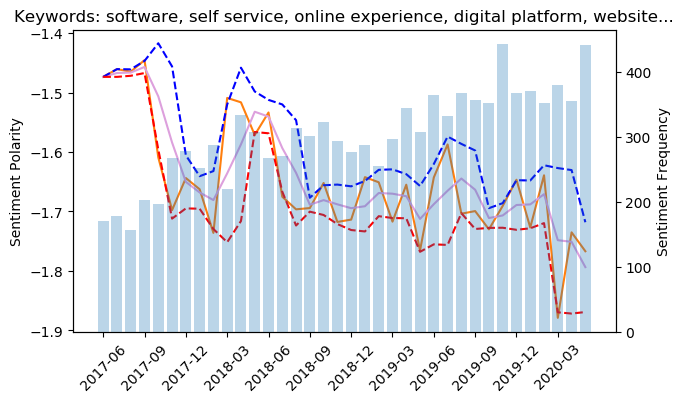

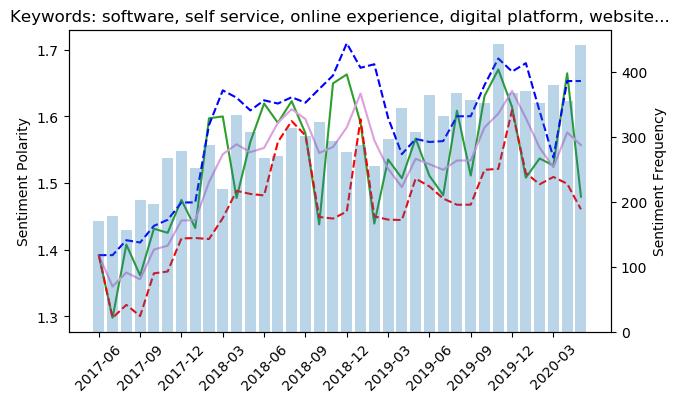

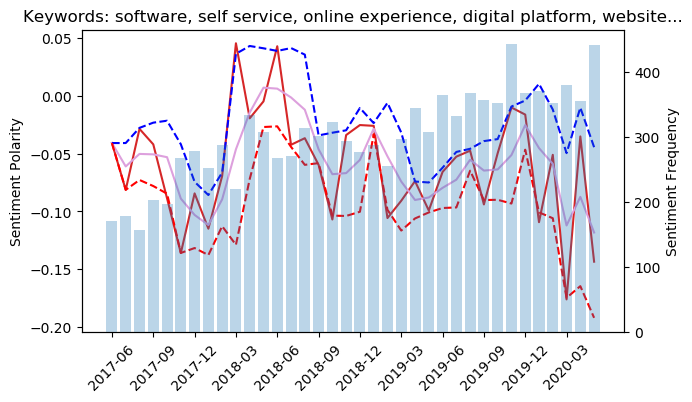

In [14]:
DPfull.trend_analysis(polarity = [0,1,2], keyword_list = topic_words,count=1,ma=3)

In [15]:
month = ['2018-02']  #choose the month here (must be a list)
#topic_words = [' app ',' apps'] #choose the topic here
tweet_result = DPfull.show_tweets(month_list = month, 
                            keywords = topic_words, 
                            count = 1,
                            threshold = 2, #choose only pos>2 & neg<-2 tweets
                            unique = True)  #choose only the unique tweets

print(f"Total Counts: {len(tweet_result)} \n")
for item in tweet_result:
    print(item[0], item[1], item[2],'\n')

Total Counts: 88 

 An amazing show of support from UBSSchulich and SchulichGBC for We stand with our student governments against bullying in schools our communities We stand for a safe happy inclusive student experience  3 -2 

 Feb WED Native Interfaces The Phantom Menace and How to Make a Project Java Compatible at Goldman Sachs NY Thx also to OReilly for Software Arch Conf bronze pass raffle OReillyUG  1 -3 

 Roubini and his pals are too cute when they call a fraud This is the definition of The bankster bank ADMITS it willfully defrauds investors hustling GARBAGE to moms and pops ripping off everyone and everyone 2 -3 

A correction isnt a worry In this kind of market a depression typically causes a drawdown of which takes decades to recover Goldman Sachs sees high probability of a stock market correction in the coming months  4 -4 

A little to the GSKSmallBiz trade expo in New Orleans this past November Great conference great businesses a wonderful experience  3 -1 

ATTENTIONFO

### 2.1.4 Discount Brokerage

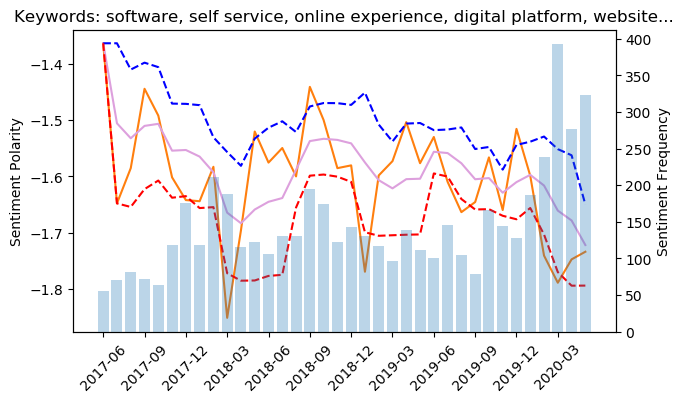

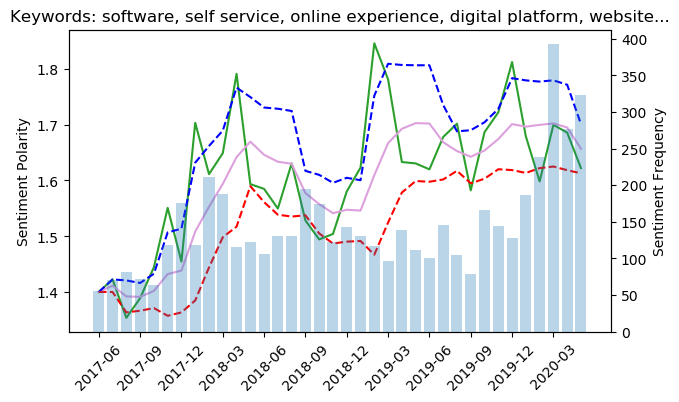

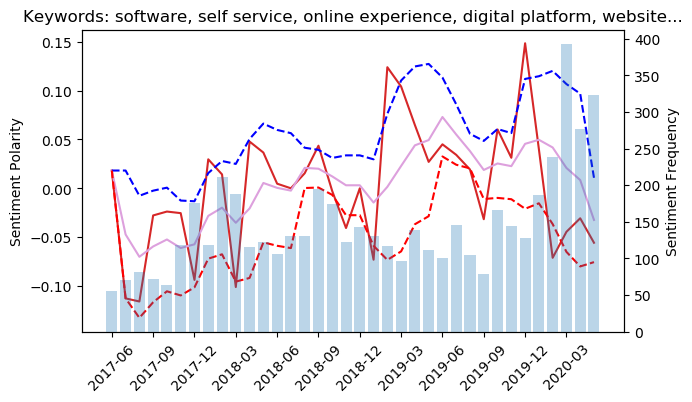

In [16]:
DPdisc.trend_analysis(polarity = [0,1,2], keyword_list = topic_words,count=2,ma=5)

### 2.1.5 Bank Brokerage

In [17]:
items=modelD.wv.most_similar(['digital','platform','app'], topn=50)
words=[_[0] for _ in items]
topic_words = list(set(['online','digital','platform','website', 'experience',' app ','site',' ui ',
               'online account','digital platform','self service','mobile app','online experience',
              'digital service','encrypted','software']))

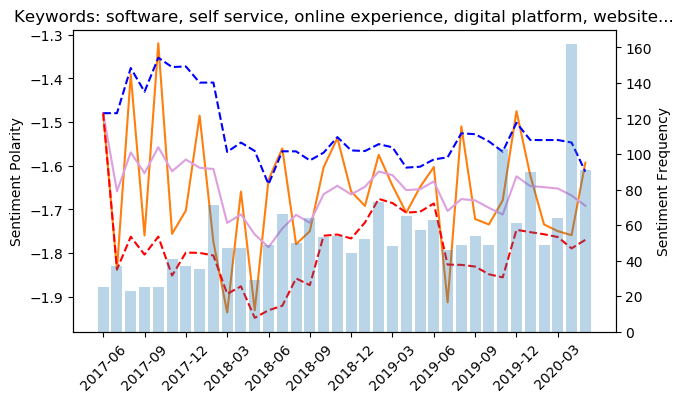

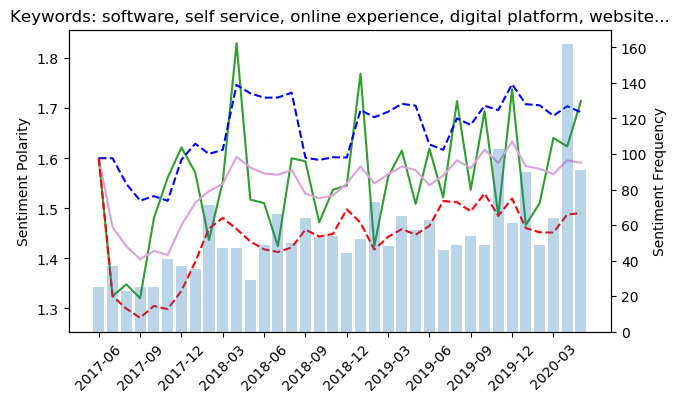

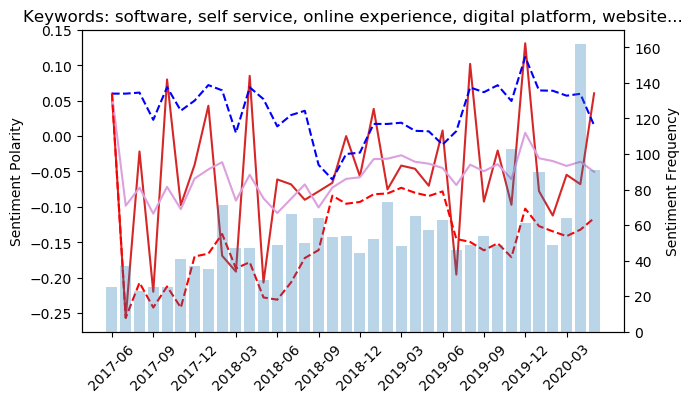

In [18]:
DPbank.trend_analysis(polarity = [0,1,2], keyword_list = topic_words,count=2,ma=5)

In [19]:
month = ['2018-01']  
tweet_result = DPbank.show_tweets(month_list = month, 
                            keywords = topic_words, 
                            count = 1 ,
                            threshold = 2, #choose only pos>2 & neg<-2 tweets
                            unique = True)  #choose only the unique tweets

print(f"Total Counts: {len(tweet_result)} \n")
for item in tweet_result:
    print(item[0], item[1], item[2],'\n')

Total Counts: 73 

 Contender ASND PT raise to at JPMorgan after positive phase single ascending dose data for TransCon PTH reinforces broader potential of TransCon platform 3 -1 

A real shame that for the second year in a row wont feature any female keynote speakers while several Csuite Execs at Twitter or jpmorgan among others suggested amazing women to hit the stage cc digitalladies PWNParis IntFem vDominiqueCrochu 3 -3 

Ah so you have direct knowledge of this stuff I just have personal experience with taxes But I can tell you this I worked for years at JP Morgan Chase when Trump was going bankrupt times The investment bankers I knew there HATED HIM 1 -4 

Are also going to have people make fake accounts on the app until you eventually are sued after fighting to keep your scam going tooth and nail Because thats the Wells Fargo I know 1 -3 

Are you a Wells Fargo customer Are you among those customers who suffered from the banks glitch doublepaying their bills online  1 -4 

AskWel

**Check for the spikes / slumps in the trend charts above (see reason why)**

**Explore each months various (pos,neg) sentiment combinations frequency**

In [20]:
month = '2017-07'
DP.sentperct(month)

NameError: name 'DP' is not defined

### 2.2 Extract topic twitter texts
Explore specifc topics and the texts that include them (with at least # count of words)

### 2.3 Explore topic modeling
Topic modeling under certain topic -> extract smaller topics/aspects of a certain topic

In [ ]:
#set topic number here
num_topics = 5
num_words = 15

#remove the stopwords here
stop_set = set(stopwords.words('english'))
stop_set.update(('http','llc','inc', 'twitter', 'tweet','morgan', 'stanley', 'morganstanley'))

In [ ]:
def LDA_analysis(data, num_topics = 10, num_words = 15, dictionary = None):
    if not dictionary:
        dictionary = corpora.Dictionary(data) # texts: list of list of words
    corpus = [dictionary.doc2bow(text) for text in data]
    passes = 30
    lda = LdaModel(corpus,
              id2word = dictionary,
              alpha = 'auto',
              num_topics = num_topics,
              passes = passes)
    
    return lda

def NMF_analysis(data, num_topics=10, num_words=15, stop_set=set(stopwords.words('english')), vocab_set=None):
    tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words=stop_set, vocabulary=vocab_set)
    doc_term_matrix = tfidf_vect.fit_transform(data) #use string dato to transform
    nmf = NMF(n_components=num_topics, random_state=42)
    nmf.fit(doc_term_matrix)
    
    all_topics = []
    for topic in nmf.components_:
        all_topics.append([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-num_words:]])
    return nmf, all_topics
 
    

In [ ]:
#Explore the specified topic here in all months

tweet_result = DP.show_tweets( 
                           month_list = DP.dlist, 
                           keywords = topic_words, 
                           count = 2,
                           threshold = 2, #choose only pos>threshold & neg<-threshold tweets
                           unique = True)  #choose only the unique tweets


#remove words with length<3 and stopwords for topic modeling
tweet_token = [[token for token in sent.split(" ") if len(token)>=3 and (token.lower() not in stop_set)]
                           for sent, _, _ in tweet_result]
dictionary = corpora.Dictionary(tweet_token)
tweet_string = [" ".join(tokens) for tokens in tweet_token]

#concatenate all list of token lists to a flat token list-> as vocabulary
vocab_set = set([token for sublist in tweet_token for token in sublist])


#### 2.3.1 LDA method - using frequency

In [ ]:
lda_model = LDA_analysis(tweet_token, #must use token for LDA
                         num_topics, num_words, dictionary)

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda_model.print_topics(num_words=num_words))

#### 2.3.2 NMF method - using matrix factorization

In [ ]:
nmf, topics = NMF_analysis(tweet_string,  #must use string for NMF
                           num_topics, num_words, 
                           stop_set, vocab_set)

for i, topic in enumerate(topics):
    print(f'Top {num_words} words for topic #{i}:')
    print(topic)
    print("\n")

### 2.4 Analyze network connection of tweets
Notice to use tokenized DPt to analyze networks -> help remove noises like stopwords

**Remark**:
If appearing errors like "*unexpected array size: new_size=1, got array with arr_size=0*", that means the data remained is too small to construct network. We can either decrease the` freq` / `count` / `thresh` or enlarge the `topic_words` set to increase the data size.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx

In [ ]:
def network_analysis(data, freq, color, title="Tweets Network Analysis") :
    vectorizer = CountVectorizer()
    vec = vectorizer.fit_transform(data)
    vec_t = vectorizer.fit_transform(data).transpose()
    
    #adjecency matrix for words
    adj_mat    = pd.DataFrame((vec_t*vec).toarray(),
                              columns = vectorizer.get_feature_names(),
                              index = vectorizer.get_feature_names())
    # #stacking combinations
    adj_mat_stack = adj_mat.stack().reset_index()
    adj_mat_stack.columns = ["link_1","link_2","count"]
    #drop same word combinations
    adj_mat_stack   = adj_mat_stack[adj_mat_stack["link_1"] !=
                                    adj_mat_stack["link_2"]] 
    
    #subset dataframe with combination count greater than 25 times
    network_sub = adj_mat_stack[adj_mat_stack["count"] > freq]
    
    #plot network
    H = nx.from_pandas_edgelist(network_sub,"link_1","link_2",["count"],
                                create_using = nx.DiGraph())

    ax = plt.figure(figsize = (8,8))
    nx.draw(H, with_labels = True, alpha = .6, 
            width = 1, node_color = color,
            style = "solid", arrowsize = 10 ,
            font_color = "black", linewidths = 6, edge_color = "lightgrey",
            node_size = 1300, pos = nx.kamada_kawai_layout(H))
    plt.title(title, color = "black")
    ax.set_facecolor("w")

In [ ]:
#add stop words here according to the picture below and need to re-tokenized again!
DPt.addstopwords((['say', 'see', 'said', 'like', 'need']))  
DPt.tokenizetext()

tweet_result = DPt.show_tweets(   #should use tokenized data here (stopwords removed)
                           month_list = DPt.dlist, 
                           keywords = topic_words, 
                           count = 2,
                           threshold = 2, #choose only pos>threshold & neg<-threshold tweets
                           unique = False)  #must choose non-unique data, otherwise no network

all_tweets = [text for text, _, _, in tweet_result]
network_analysis(all_tweets, freq=10, color="#5daec7")